# AGGREGATE KPI AND VISUALIZE DATA

In [2]:
import pandas as pd
import sys
import os

# Add project root to Python path to allow module imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.kpi import aggregate_kpis
from src.utils.visualization import visualize_summary, visualize_customer_segments, visualize_temporal_trends, visualize_trip_characteristics, visualize_geographical_analysis

## AGGREGATE KPI

In [3]:
df1_cleaned = pd.read_parquet("../processed/cleaned_data/cleaned_yellow_tripdata_2021-01.parquet")
df1_flags = pd.read_parquet("../processed/flags_for_analysis/flag_yellow_tripdata_2021-01.parquet")
df1_kpis = aggregate_kpis(df1_cleaned, df1_flags)


### DAILY CALCULATION

In [4]:
df1_kpis['Daily'].head()

,tpep_pickup_datetime,Date,Day_of_Week,Total_trips,Total_fare,Total_amount,speed_p50,duration_p50,duration_p95,distance_p50,...,avg_distance,revenue_per_trip,revenue_per_mile,Early Morning,Morning,Morning Rush,Midday,Evening Rush,Late Night,index_100_by_day_by_trips
0,2021-01-01 00:00:00-05:00,2021-01-01,Friday,23031,308141.03,340919.14,14.59,9.0,29.0,2.00,...,3.599251,13.379403,3.717274,892.75 / 906.0,225.67 / 224.0,525.0 / 511.33,1441.83 / 1394.5,1619.0 / 1657.33,740.0 / 772.4,100.000000
1,2021-01-02 00:00:00-05:00,2021-01-02,Saturday,32338,432873.81,477578.39,12.69,10.0,31.0,1.87,...,3.459479,13.385918,3.869345,128.75 / 163.0,167.33 / 153.33,767.67 / 719.33,2406.17 / 2328.17,2657.67 / 2707.0,1321.6 / 1395.6,140.410751
2,2021-01-03 00:00:00-05:00,2021-01-03,Sunday,24594,359374.80,394131.39,14.38,9.0,32.0,1.91,...,4.077193,14.612296,3.583911,226.0 / 256.0,188.67 / 169.33,647.33 / 616.67,1856.5 / 1810.17,1988.0 / 2029.33,815.8 / 852.6,106.786505
3,2021-01-04 00:00:00-05:00,2021-01-04,Monday,41740,539928.14,598684.37,12.31,9.0,31.0,1.78,...,3.242287,12.935509,3.989625,147.25 / 166.5,471.67 / 389.67,2298.0 / 2221.0,3128.0 / 3095.0,2955.0 / 3034.33,1041.8 / 1113.8,181.233989
4,2021-01-05 00:00:00-05:00,2021-01-05,Tuesday,43917,535110.59,597698.53,11.82,9.0,30.0,1.70,...,2.988863,12.184589,4.076664,159.5 / 175.75,438.67 / 373.0,2332.67 / 2226.33,3304.83 / 3275.5,3148.67 / 3243.0,1138.0 / 1206.8,190.686466


### WEEKLY CALCULATION

In [5]:
df1_kpis['Weekly'].head()

,tpep_pickup_datetime,Date,Day_of_Week,Total_trips,Total_fare,Total_amount,speed_p50,duration_p50,duration_p95,distance_p50,distance_p95,avg_distance,revenue_per_trip,revenue_per_mile,Early Morning,Morning,Morning Rush,Midday,Evening Rush,Late Night
0,2021-01-03 00:00:00-05:00,2021-01-01,Friday,79963,1100389.64,1212628.92,13.74,9.0,31.0,1.90,15.66,3.689725,13.761235,3.729610,1247.5 / 1325.0,581.67 / 546.67,1940.0 / 1847.33,5704.5 / 5532.83,6264.67 / 6393.67,2877.4 / 3020.6
1,2021-01-10 00:00:00-05:00,2021-01-04,Monday,291460,3552381.08,3971672.27,12.12,9.0,30.0,1.71,11.00,3.008818,12.188229,4.050836,1287.0 / 1442.25,2569.67 / 2199.67,13658.67 / 13035.0,21483.0 / 21203.83,21788.0 / 22234.0,8673.0 / 9212.4
2,2021-01-17 00:00:00-05:00,2021-01-11,Monday,304071,3600622.60,4017406.81,11.84,9.0,29.0,1.71,9.86,2.858656,11.841388,4.142293,1228.0 / 1400.25,2692.0 / 2301.0,14614.67 / 13942.0,22149.0 / 21866.17,22492.33 / 22910.0,9373.6 / 9962.8
3,2021-01-24 00:00:00-05:00,2021-01-18,Monday,299547,3512858.67,3874337.70,11.83,9.0,29.0,1.70,9.67,2.828768,11.727237,4.145704,1303.5 / 1466.25,2458.0 / 2092.33,13782.0 / 13156.0,22122.0 / 21786.17,22293.67 / 22788.67,9200.0 / 9770.8
4,2021-01-31 00:00:00-05:00,2021-01-25,Monday,308952,3558526.78,3932353.25,11.44,9.0,29.0,1.66,9.10,3.087227,11.518057,3.730875,1189.0 / 1335.0,2669.67 / 2290.0,15353.33 / 14595.33,22681.0 / 22438.5,23243.33 / 23587.0,8862.2 / 9512.8


### MONTHLY CALCULATION

In [6]:
df1_kpis['Monthly'].head()

,tpep_pickup_datetime,Date,Day_of_Week,Total_trips,Total_fare,Total_amount,speed_p50,duration_p50,duration_p95,distance_p50,distance_p95,avg_distance,revenue_per_trip,revenue_per_mile,Early Morning,Morning,Morning Rush,Midday,Evening Rush,Late Night
0,2021-01-31 00:00:00-05:00,2021-01-01,Friday,1283993,15324778.77,17008398.95,11.9,9.0,29.0,1.7,10.2,2.992524,11.935251,3.988356,6255.0 / 6968.75,10971.0 / 9429.67,59348.67 / 56575.67,94139.5 / 92827.5,96082.0 / 97913.33,38986.2 / 41479.4


## VISUALIZE DATA

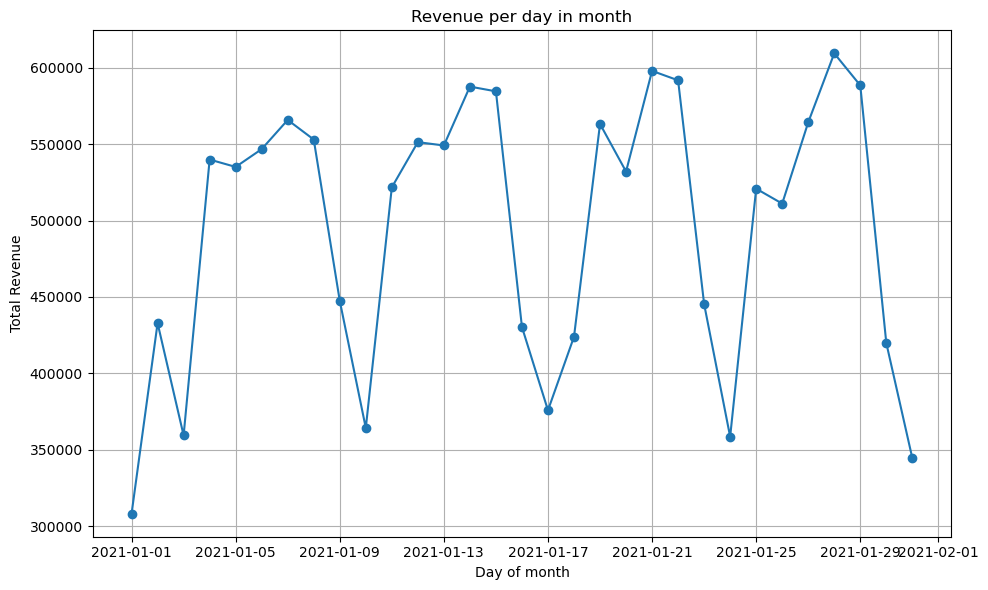

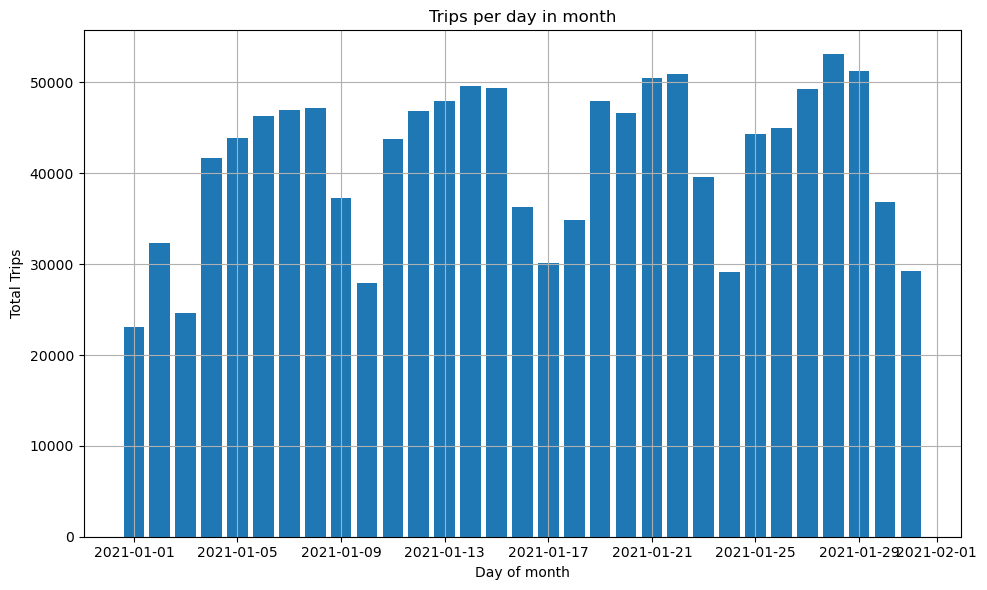

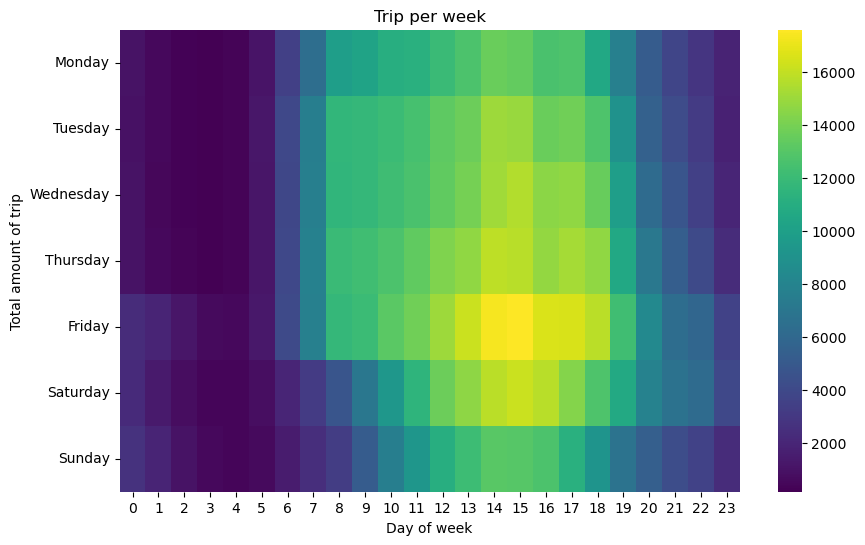

In [7]:
df1_kpi_daily = df1_kpis['Daily']
visualize_summary(df1_cleaned, df1_kpi_daily)

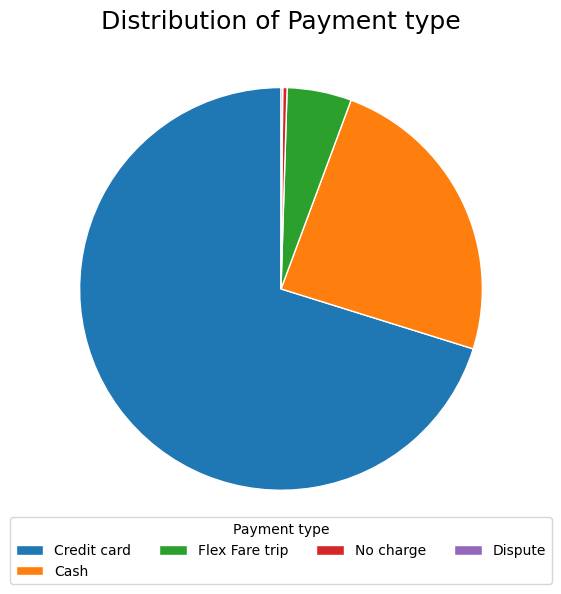

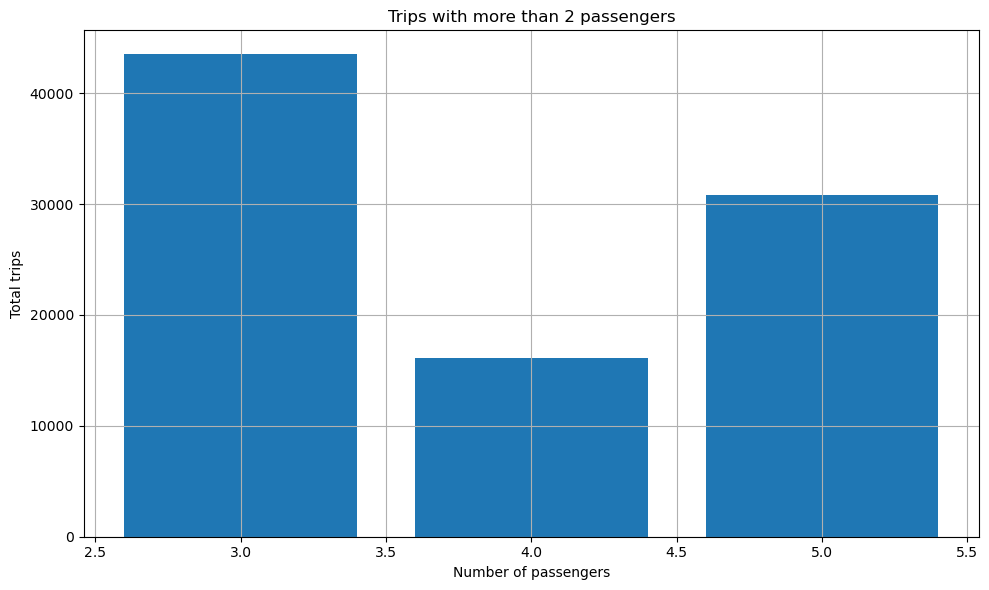

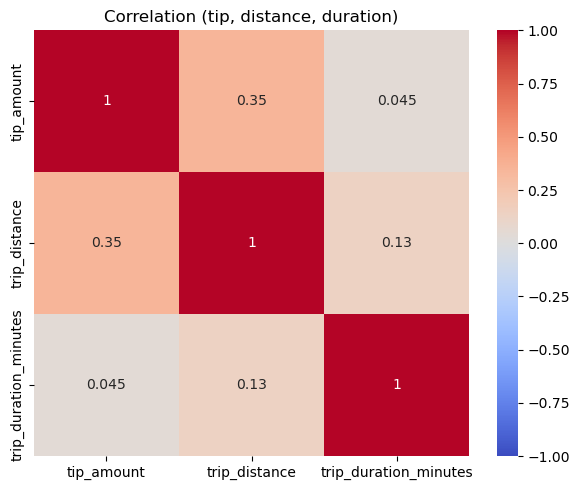

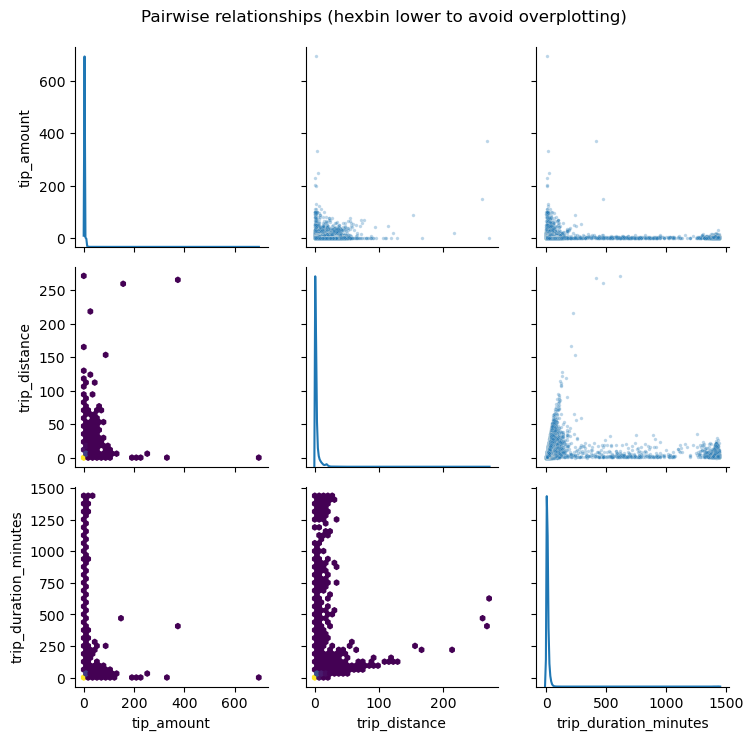

In [9]:
visualize_customer_segments(df1_cleaned, df1_flags)

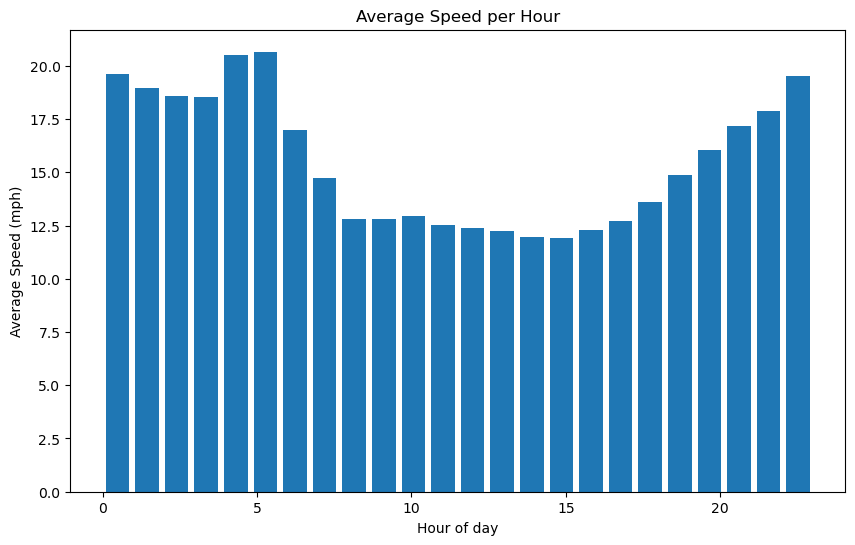

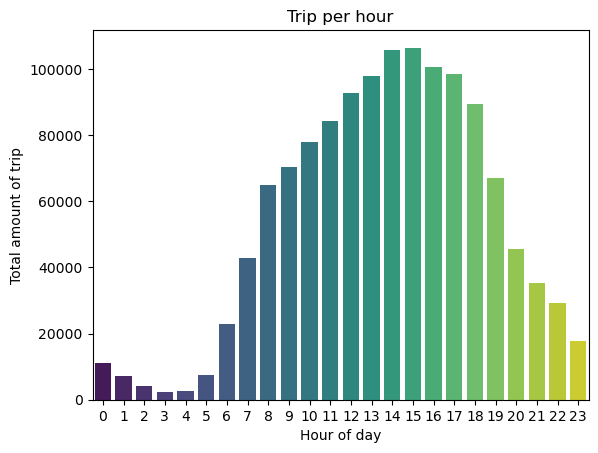

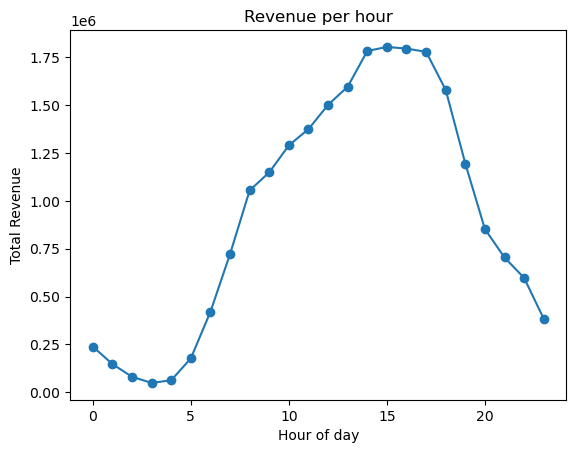

In [10]:
visualize_temporal_trends(df1_cleaned, df1_flags)

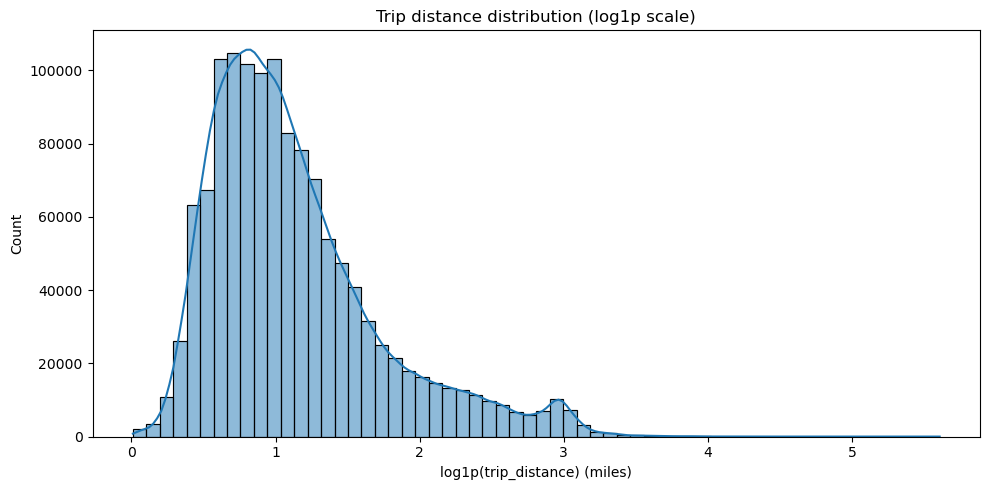

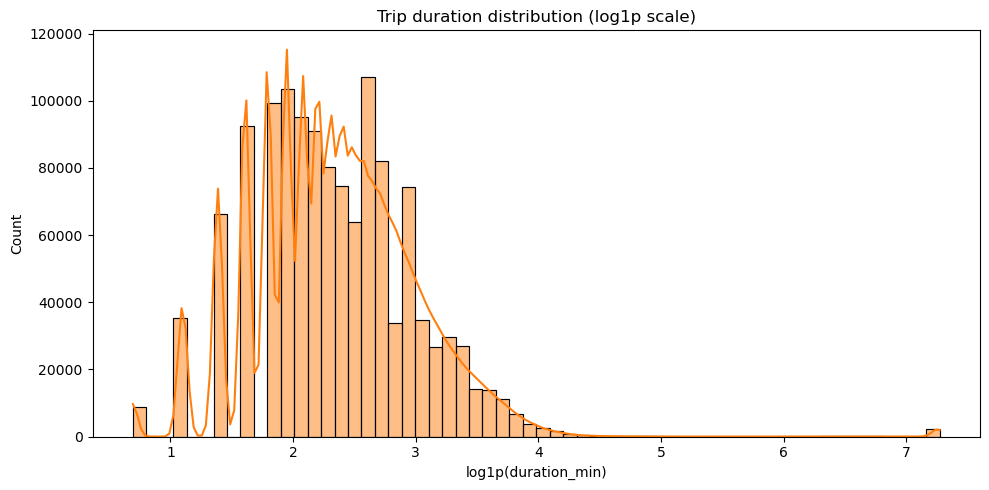

In [11]:
visualize_trip_characteristics(df1_cleaned, df1_flags)

## AGGREGATE KPIS AND VISUALIZATION OF 12 MONTHS FOR ANALYSIS